# Limits Involving Infinity
## Introduction
The symbol $\infty$ (infinity) does not represent a real number in $\mathbb{R}$. Instead, we use $\infty$ to describe the behavior of a function when the values in its domain or range outgrow all finite bounds.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

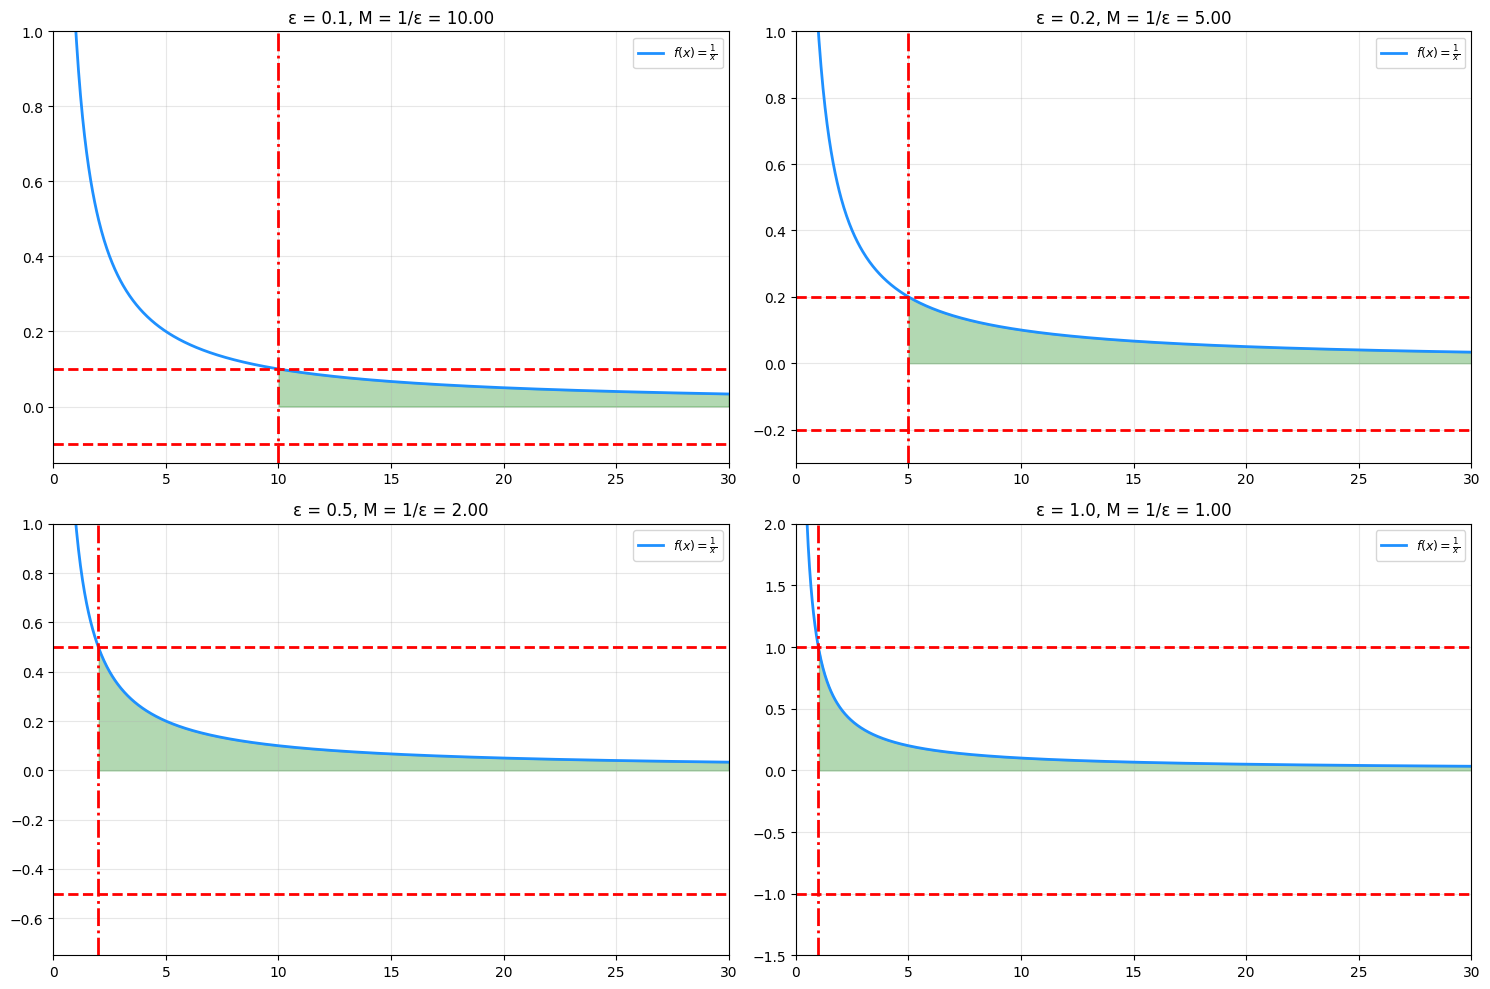

In [3]:
def plot_multiple_epsilons():
    """Create multiple plots showing different epsilon values"""
    epsilon_values = [0.1, 0.2, 0.5, 1.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    x = np.linspace(0.1, 30, 1000)
    y = 1 / x
    
    for i, eps in enumerate(epsilon_values):
        ax = axes[i]
        M = 1 / eps
        
        # Plot main function
        ax.plot(x, y, 'dodgerblue', linewidth=2, label=r'$f(x) = \frac{1}{x}$')
        
        # Plot epsilon bounds
        ax.axhline(y=eps, color='red', linestyle='--', linewidth=2)
        ax.axhline(y=-eps, color='red', linestyle='--', linewidth=2)
        
        # Plot M line
        if M <= 30:
            ax.axvline(x=M, color='red', linestyle='-.', linewidth=2)
            
            # Highlight region
            x_highlight = x[x > M]
            y_highlight = 1 / x_highlight
            ax.fill_between(x_highlight, 0, y_highlight, alpha=0.3, color='green')
        
        ax.set_xlim(0, 30)
        ax.set_ylim(-eps * 1.5, max(1, eps * 2))
        ax.set_title(f'ε = {eps}, M = 1/ε = {M:.2f}', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
plot_multiple_epsilons()

## Types of Limits Involving Infinity

### 1. Finite Limit as $x \to \pm\infty$

When we write $\lim_{x \to \infty} f(x) = L$ where $L$ is a finite number, we mean:

**Definition**: For any $\epsilon > 0$, there exists a number $M$ such that if $x > M$, then $|f(x) - L| < \epsilon$.

Similarly, $\lim_{x \to -\infty} f(x) = L$ means:

**Definition**: For any $\epsilon > 0$, there exists a number $N$ such that if $x < N$, then $|f(x) - L| < \epsilon$.

#### Examples:
- $\lim_{x \to \infty} \frac{1}{x} = 0$
- $\lim_{x \to \infty} \frac{3x + 2}{x + 1} = 3$
- $\lim_{x \to -\infty} e^x = 0$

### 2. Infinite Limits at Finite Points

When we write $\lim_{x \to a} f(x) = \infty$, we mean:

**Definition**: For any positive number $M$, there exists $\delta > 0$ such that if $0 < |x - a| < \delta$, then $f(x) > M$.

#### Examples:
- $\lim_{x \to 0} \frac{1}{x^2} = \infty$
- $\lim_{x \to 2^+} \frac{1}{x - 2} = \infty$
- $\lim_{x \to 2^-} \frac{1}{x - 2} = -\infty$

### 3. Infinite Limits at Infinity

When we write $\lim_{x \to \infty} f(x) = \infty$, we mean:

**Definition**: For any positive number $M$, there exists a number $N$ such that if $x > N$, then $f(x) > M$.

#### Examples:
- $\lim_{x \to \infty} x^2 = \infty$
- $\lim_{x \to \infty} e^x = \infty$
- $\lim_{x \to -\infty} -x^3 = \infty$



## Key Properties and Rules

### Horizontal Asymptotes
If
$$
\lim_{x \to \infty} f(x) = L \quad \text{or} \quad \lim_{x \to -\infty} f(x) = L,
$$
the line $y = L$ is called a **horizontal asymptote** of the function $f(x)$.

**Example**
$$
\lim_{x \to \infty} \frac{1}{x} = 0 \quad \text{and} \quad \lim_{x \to -\infty} \frac{1}{x} = 0
$$
Thus, the line $y = 0$ (the x-axis) is a **horizontal asymptote** of the graph $f(x) = \frac{1}{x}$.

(-10.0, 10.0)

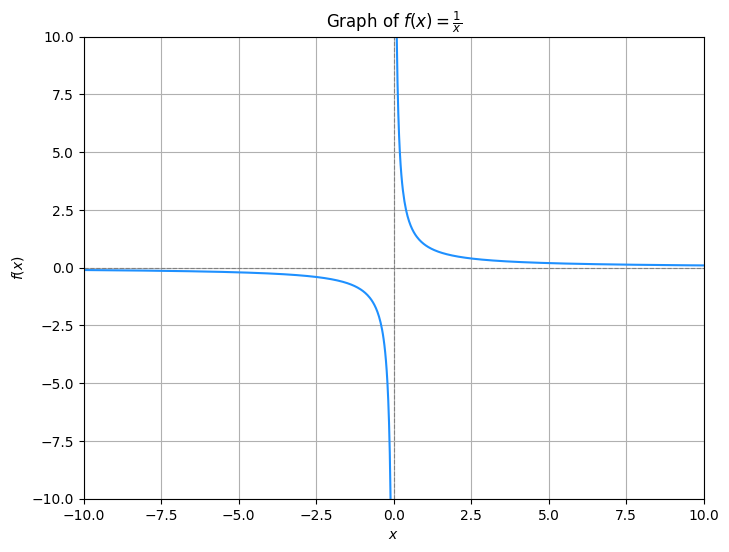

In [4]:
def horizontal_function(x):
    return 1/x

# Generate x values, avoiding x = 0
x_neg = np.linspace(-10, -0.1, 400)
x_pos = np.linspace(0.1, 10, 400)

# Calculate y values
y_neg = horizontal_function(x_neg)
y_pos = horizontal_function(x_pos)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_neg, y_neg, color='dodgerblue')
plt.plot(x_pos, y_pos, color='dodgerblue')

# Add labels and title
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Graph of $f(x) = \\frac{1}{x}$')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Horizontal asymptote at y=0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Vertical asymptote at x=0
plt.ylim(-10, 10)
plt.xlim(-10, 10)


-----
### Real World Application of Horizontal Asymptotes
**Terminal Velocity**

This project provides a simple function to calculate the velocity of a falling object as it approaches its terminal velocity. The model is based on the formula:
$$v(t) = v_t \left(1 - e^{-k t}\right)$$
where:

  * $v(t)$ is the velocity at time $t$
  * $v\_t$ is the terminal velocity
  * $t$ is the time elapsed since the object began falling
  * $k$ is a constant related to air resistance and the object's mass

-----

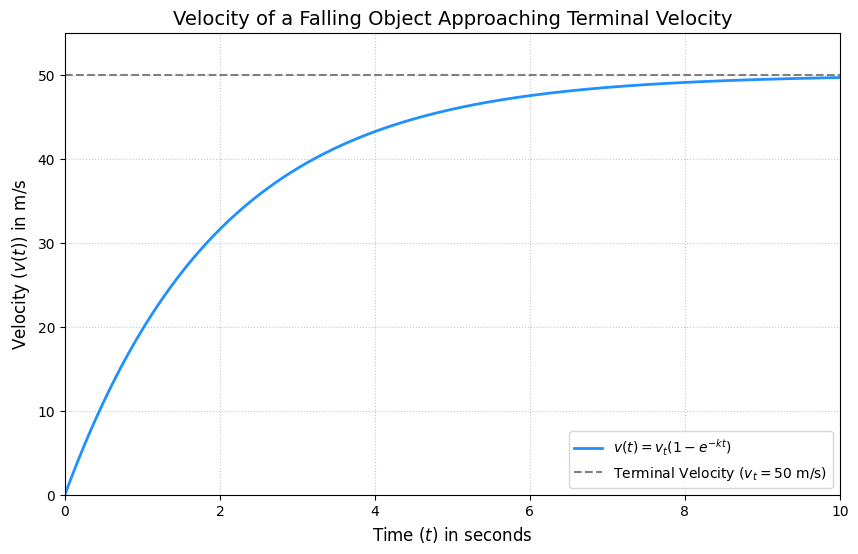

In [5]:
def terminal_velocity_function(t, v_terminal, k):
    """
    Calculates the velocity of a falling object approaching terminal velocity.

    Args:
        t (float or np.array): Time elapsed.
        v_terminal (float): The terminal velocity of the object.
        k (float): A constant related to air resistance and mass (determines
                   how quickly the object approaches terminal velocity).

    Returns:
        float or np.array: The velocity of the object at time t.
    """
    return v_terminal * (1 - np.exp(-k * t))

# --- Parameters for the simulation ---
v_t = 50  # Terminal velocity (e.g., 50 m/s)
k = 0.5   # Constant related to air resistance (e.g., 0.5 1/s)

# Generate a range of time values
t = np.linspace(0, 10, 500) # Time from 0 to 10 seconds

# Calculate the velocity at each time point
velocity = terminal_velocity_function(t, v_t, k)

# --- Plotting the graph ---
plt.figure(figsize=(10, 6)) # Set figure size for better visualization
plt.plot(t, velocity, color='dodgerblue', linewidth=2, label=r'$v(t) = v_t (1 - e^{-kt})$')

# Plot the horizontal asymptote (terminal velocity)
plt.axhline(v_t, color='gray', linestyle='--', linewidth=1.5, label=f'Terminal Velocity ($v_t = {v_t}$ m/s)')

# Add labels and title
plt.xlabel('Time ($t$) in seconds', fontsize=12)
plt.ylabel('Velocity ($v(t)$) in m/s', fontsize=12)
plt.title('Velocity of a Falling Object Approaching Terminal Velocity', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.legend(fontsize=10) # Display the legend
plt.ylim(0, v_t * 1.1) # Set y-axis limits to show a bit above terminal velocity
plt.xlim(0, max(t)) # Set x-axis limits

# Customize tick marks
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## Oblique Asymptotes (Slant)

If the degree of the numerator of a rational function is 1 greater than the degree of the denominator, the graph has an **oblique** or **slant** line asymptote.

### Finding the Asymptote's Equation

We find an equation for the asymptote by **dividing the numerator by the denominator**. This expresses the function $f(x)$ as a **linear function** plus a remainder that approaches zero as $x$ goes to infinity ($x → ±∞$).

### Example

Given Rational Function $f(x) = \frac{g(x)}{h(x)}$, if the degree of $g(x)$ is exactly 1 greater than the degree of $h(x)$, then an oblique asymptote exists.


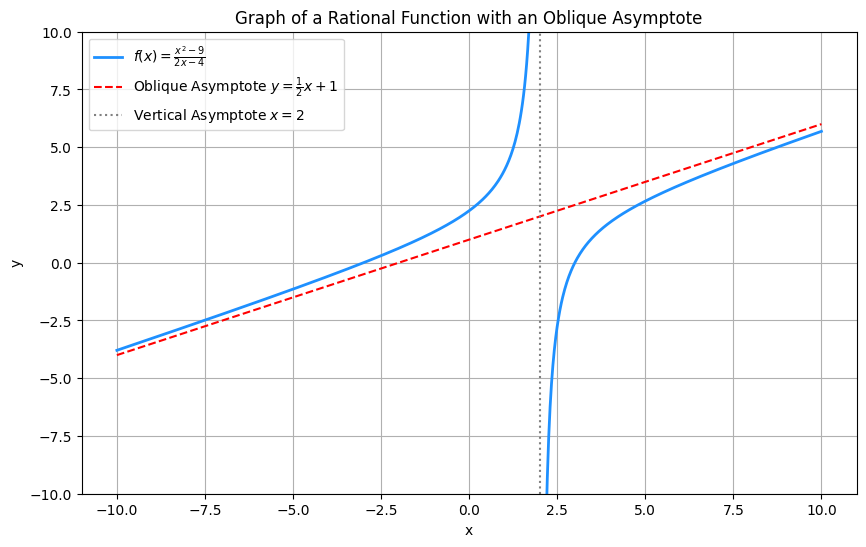

In [6]:
def f(x):
    return (x**2 - 9) / (2*x - 4)

def oblique_asymptote(x):
    return 0.5*x + 1

x1 = np.linspace(-10, 1.9, 400)
x2 = np.linspace(2.1, 10, 400)

plt.figure(figsize=(10, 6))

plt.plot(x1, f(x1), color='dodgerblue', linewidth=2, label=r'$f(x) = \frac{x^2-9}{2x-4}$')
plt.plot(x2, f(x2), color='dodgerblue', linewidth=2)

asymptote_x = np.linspace(-10, 10, 400)
plt.plot(asymptote_x, oblique_asymptote(asymptote_x), color='red', linestyle='--', label=r'Oblique Asymptote $y = \frac{1}{2}x + 1$')
plt.axvline(x=2, color='gray', linestyle=':', label=r'Vertical Asymptote $x=2$')
plt.title('Graph of a Rational Function with an Oblique Asymptote')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

---
**Finding the Oblique Asymptote**

The oblique asymptote exists because the degree of the numerator (2) is **exactly one greater** than the degree of the denominator (1). We find the equation of the asymptote by performing **polynomial long division**.

$$
\begin{array}{c}
\frac{1}{2}x+1 \\
2x-4\overline{)x^2+0x-9} \\
\underline{-(x^2-2x)} \\
2x-9 \\
\underline{-(2x-4)} \\
-5
\end{array}
$$

The result of the division can be written in the form:
$$\frac{x^2-9}{2x-4} = \underbrace{\frac{1}{2}x + 1}_{\text{Quotient}} + \underbrace{\frac{-5}{2x-4}}_{\text{Remainder}}$$

As $x \rightarrow \pm\infty$, the remainder term $\frac{-5}{2x-4}$ approaches zero. Therefore, the function $f(x)$ approaches the quotient, which is a linear function.

The equation of the **oblique asymptote** is the linear part of the result:
$$y = \frac{1}{2}x + 1$$

---

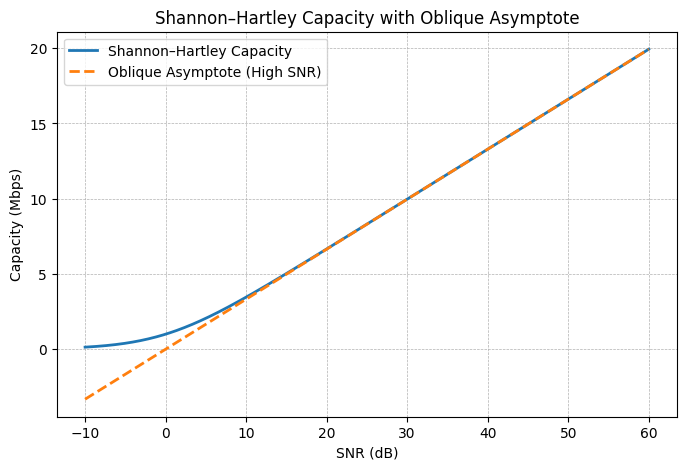

In [7]:
# ----- Parameters -----
B = 1e6  # Bandwidth = 1 MHz
SNR_dB = np.linspace(-10, 60, 500)  # SNR range in dB
SNR_linear = 10**(SNR_dB / 10)      # Convert dB to linear scale

# ----- Shannon–Hartley capacity -----
C = B * np.log2(1 + SNR_linear)  # in bits per second

# ----- Oblique asymptote at high SNR -----
m = (B / 10) * np.log2(10)       # slope in bps per dB
C_asymptote = m * SNR_dB         # line through origin

# ----- Plot -----
plt.figure(figsize=(8,5))
plt.plot(SNR_dB, C/1e6, label="Shannon–Hartley Capacity", linewidth=2)
plt.plot(SNR_dB, C_asymptote/1e6, '--', label="Oblique Asymptote (High SNR)", linewidth=2)
plt.xlabel("SNR (dB)")
plt.ylabel("Capacity (Mbps)")
plt.title("Shannon–Hartley Capacity with Oblique Asymptote")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

---

## Infinite Limit

Let’s look at

$$
f(x) = \frac{1}{x}
$$

as $x \to 0^+$. The value of $f(x)$ grows without bound:

$$
\forall M \in \mathbb{R}, \ \exists \ \delta > 0 \ \text{such that if} \ 0 < x < \delta, \quad f(x) > M.
$$

This is expressed as:

$$
\lim_{x \to 0^+} f(x) = \lim_{x \to 0^+}\frac{1}{x} = +\infty.
$$

Here, we are **not** claiming that the limit exists in $\mathbb{R}$, nor that $\exists \ x \in \mathbb{R}$ such that $f(x) = +\infty$. Rather, this notation is a concise way of saying that $f(x)$ becomes arbitrarily large and positive as $x$ approaches $0$ from the right.

Similarly, as $x \to 0^-$, the value of $f(x)$ becomes arbitrarily large in magnitude but **negatively**:

$$
\forall N \in \mathbb{R}, \ \exists \ \delta > 0 \ \text{such that if} \ -\delta < x < 0, \quad f(x) < N,
$$

where $N$ is any real number (usually taken to be negative), meaning $f(x)$ becomes arbitrarily large negative. This is expressed as:

$$
\lim_{x \to 0^-} f(x) = \lim_{x \to 0^-}\frac{1}{x} = -\infty.
$$

**Example**

Consider the function $f(x) = \frac{1}{x^2}$ as $x \to 0$. We observe that $f(x) = \frac{1}{x^2}$ is always positive and becomes arbitrarily large as $x$ approaches zero from either side. Unlike the function $f(x) = \frac{1}{x}$, which tends to $+\infty$ when $x \to 0^+$ and to $-\infty$ when $x \to 0^-$, the function $\frac{1}{x^2}$ grows without bound in the same positive direction from both sides.

Therefore, we conclude that the limit exists (in the extended sense) and can be written as:

$$
\lim_{x \to 0} \frac{1}{x^2} = +\infty.
$$

---


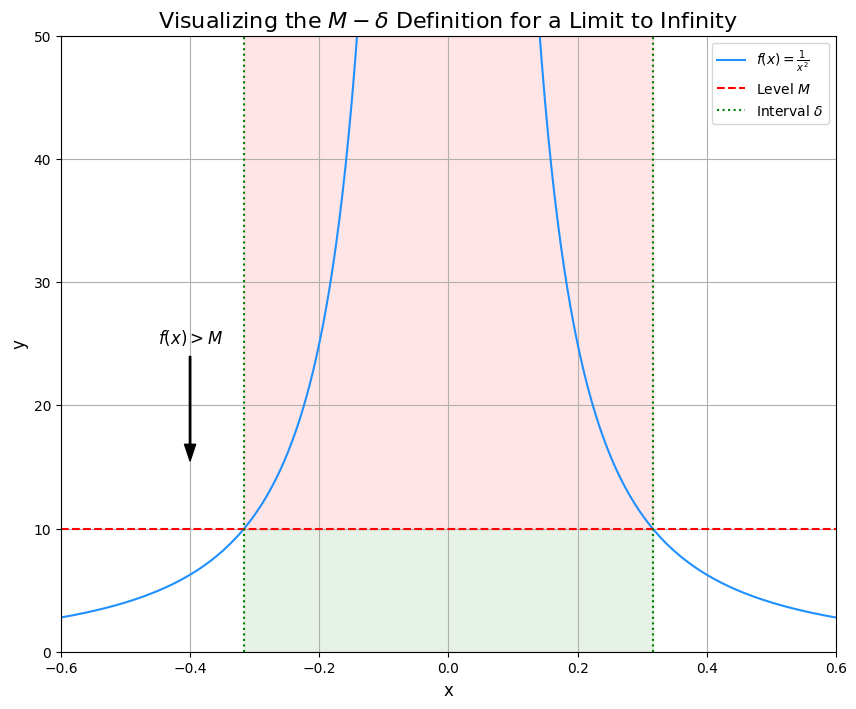

In [8]:
def f(x):
    return 1 / x**2

# Define the M and calculate the corresponding delta
M = 10
delta = 1 / np.sqrt(M)

# Create two ranges for x to avoid the vertical asymptote at x=0
x1 = np.linspace(-1, -0.01, 200)
x2 = np.linspace(0.01, 1, 200)

# Calculate y values for both ranges
y1 = f(x1)
y2 = f(x2)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the two parts of the function
plt.plot(x1, y1, color='dodgerblue', label=r'$f(x) = \frac{1}{x^2}$')
plt.plot(x2, y2, color='dodgerblue')

# Plot the M line
plt.axhline(y=M, color='red', linestyle='--', label=r'Level $M$')

# Plot the delta lines
plt.axvline(x=delta, color='green', linestyle=':', label=r'Interval $\delta$')
plt.axvline(x=-delta, color='green', linestyle=':')

# Add shading to represent the intervals
plt.fill_between(np.linspace(-delta, delta, 2), 0, M, color='green', alpha=0.1)
plt.fill_betweenx(np.linspace(M, 50, 2), -delta, delta, color='red', alpha=0.1)

# Annotate the plot to clarify the ranges
plt.annotate(
    r'$0 < |x| < \delta$',
    xy=(0, -5),
    xytext=(0.2, -5),
    fontsize=12,
    ha='center',
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8)
)
plt.annotate(
    r'$f(x) > M$',
    xy=(-0.4, M + 5),
    xytext=(-0.4, M + 15),
    fontsize=12,
    ha='center',
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8)
)


# Set the title and labels
plt.title(r'Visualizing the $M-\delta$ Definition for a Limit to Infinity', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

# Set the axis limits for a better view
plt.ylim(0, 50)
plt.xlim(-0.6, 0.6)

# Add a grid for better readability
plt.grid(True)
plt.legend()

## Vertical Asymptotes

A line x = a is **vertical asymptotes** of grapth of a function $\quad y = f(x) \quad $ if either
$$
\lim_{x \to a^+}f(x) = \pm \infty \quad \text{or} \quad \lim_{x \to a^-}f(x) = \pm 
$$

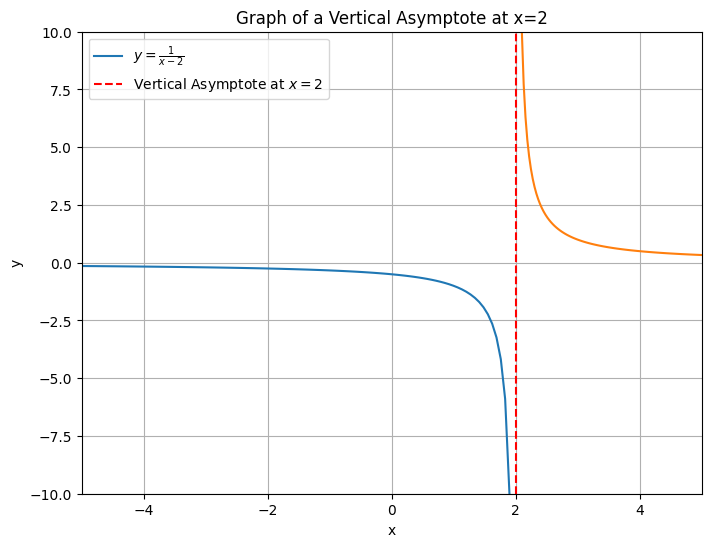

In [9]:
def f(x):
    return 1/(x-2)

# Create x values, avoiding x = 2
x_neg = np.linspace(-5, 1.9, 100)
x_pos = np.linspace(2.1, 5, 100)

# Calculate y values
y_neg = f(x_neg)
y_pos = f(x_pos)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the two parts of the function
plt.plot(x_neg, y_neg, label=r'$y = \frac{1}{x-2}$')
plt.plot(x_pos, y_pos)

# Plot the vertical asymptote
plt.axvline(x=2, color='red', linestyle='--', label='Vertical Asymptote at $x=2$')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of a Vertical Asymptote at x=2')
plt.grid(True)
plt.ylim(-10, 10)
plt.xlim(-5, 5)
plt.legend()